# ĐỒ ÁN THỰC HÀNH: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

- Môn học: Lập Trình Cho Khoa Học Dữ Liệu
- Nhóm: 6

## 1. Thu thập dữ liệu

Đây là bộ dữ liệu lịch sử về Thế vận hội Olympic hiện đại, bao gồm tất cả các Thế vận hội từ Athens 1896 đến Rio 2016.
Lưu ý rằng Thế vận hội Mùa đông và Mùa hè được tổ chức trong cùng một năm cho đến năm 1992. Sau đó, họ mới xen kẽ chúng (2 năm/lần): Thế vận hội Mùa đông diễn ra năm 1994, sau đó là Mùa hè năm 1996, rồi Mùa đông năm 1998, v.v. . Một sai lầm phổ biến mà mọi người mắc phải khi phân tích dữ liệu này là cho rằng Thế vận hội Mùa hè và Mùa đông luôn luôn được sắp xếp xen kẽ.

Link dataset: `https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results`

License: CC0: Public Domain (không có bản quyền, cho phép mọi người có thể sao chép, sửa đổi, phân phối hay ngay cả sử dụng với mục đích thương mại mà không cần phải xin phép).

Cách thu thập dữ liệu: Tác giả đã sử dụng R để cào dữ liệu từ website `www.sports-reference.com` vào tháng 5/2018. Dữ liệu của website là kết quả 1 cuộc nghiên cứu quy mô lớn của 1 nhóm những người đam mê lịch sử Thế vận hội và những người tự xưng mình là 'nhà thống kê'.

## 2. Khám phá dữ liệu

### Import các thư viện

In [1]:
import sys
sys.executable

'C:\\Users\\ParaboY\\anaconda3\\python.exe'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

#Nếu chưa có pycountry thì bỏ dấu # ở dưới rồi run để install
#!pip install pycountry
import pycountry

### Đọc dữ liệu từ file csv vào dataframe

File `athlete_events.csv` cho biết những thông tin về các vận động viên đã tham gia Olympics.

In [3]:
ethlete_df = pd.read_csv('athlete_events.csv')
ethlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Còn file `noc_regions.csv` cho biết mỗi mã NOC (National Olympic Committees - Đoàn đại biểu Uỷ ban Olympic quốc gia) sẽ tương ứng với vùng lãnh thổ nào và những ghi chú (nếu có).

In [4]:
noc_df = pd.read_csv('noc_regions.csv')
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Để thuận lợi cho việc thao tác với dữ liệu, ta sẽ tiến hành gộp 2 dataframe thông qua cột chung là NOC:

In [5]:
ethlete_df = ethlete_df.merge(noc_df, on = 'NOC', how = 'left')
ethlete_df.shape

(271116, 17)

### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột và lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [6]:
num_rows, num_cols = ethlete_df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  271116
Num cols:  17


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của trang web `www.sports-reference.com` và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một vận động viên tham gia Thế vận hội Mùa đông và Mùa hè.

### Dữ liệu có các dòng bị lặp không? Nếu có, xử lý những dòng bị lặp

Ta sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [7]:
have_duplicated_rows = ethlete_df.duplicated().sum() > 0
have_duplicated_rows

True

Kết quả kiểm tra cho thấy dữ liệu có dòng bị trùng lắp, do đó ta cần phải loại bỏ những dòng lặp đó đi.

In [8]:
ethlete_df.drop_duplicates(inplace = True)
ethlete_df.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của trang web `www.sports-reference.com` về các cột trong file "ethlete_event.csv":
- **ID**: Chỉ số duy nhất cho mỗi vận động viên.
- **Name**: Tên của vận động viên tham dự.
- **Sex**: Giới tính của vận động viên tham dự.
- **Age**: Tuổi của vận động viên tham dự .
- **Weight**: Cân nặng của vận động viên tham dự.
- **Team**: Tên đội của vận động viên tham dự.
- **NOC**: Ủy ban Olympic quốc gia.
- **Games**: Tên của Thế vận hội vận động viên tham dự.
- **Year**: Năm tổ chức Thế vận hội vận.
- **Season**: Mùa tổ chức Thế vận hội vận.
- **City**: Thành phố tổ chức Thế vận hội vận.
- **Sport**: Môn thi đấu của vận động viên.
- **Event**: Nội dung thi đấu vận động viên.
- **Medal**: Huy chương vận động viên đạt được.
- **region**: Quốc tịch của vận động viên.
- **notes**: Ghi chú

### Loại bỏ các cột không cần thiết, cột chứa nhiều dữ liệu trống.

Ta tính tỉ lệ phần trâm các giá trị bị thiếu trong các cột để chọn ra những cột có tỉ lệ giá trị bị thiếu lớn và loại bỏ.

In [9]:
per_null = dict(ethlete_df.isnull().sum() / num_rows)
per_null

{'ID': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 0.03435798698711991,
 'Height': 0.21693297333982503,
 'Weight': 0.22693976010268668,
 'Team': 0.0,
 'NOC': 0.0,
 'Games': 0.0,
 'Year': 0.0,
 'Season': 0.0,
 'City': 0.0,
 'Sport': 0.0,
 'Event': 0.0,
 'Medal': 0.8481941309255079,
 'region': 0.0013647294884846339,
 'notes': 0.9763200991457531}

Ta thấy cột **notes** có tỉ lệ giá trị thiếu rất lớn và cột này cũng thật sự không cần thiết trong việc phân tích dữ liệu nên ta sẽ bỏ nó.

In [10]:
ethlete_df.drop('notes', axis = 1, inplace = True)
num_cols = ethlete_df.shape[1]
print("Num cols: ", num_cols)
ethlete_df.columns

Num cols:  16


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

Để dễ dàng hơn trong việc tính số lượng huy chương, ta sẽ tạo thêm cột isWon để lưu giá trị xem vận động viên có giành được huy chương hay không, nếu có thì `isWon` sẽ có giá trị là 1, ngược lại là 0.

In [11]:
ethlete_df['isWon'] = np.where(ethlete_df['Medal'].isna(), 0, 1)
ethlete_df['isWon'] = ethlete_df['isWon'].astype(bool)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Dưới đây là kiểu dữ liệu của mỗi cột trong `ethlete_df` :

In [12]:
ethlete_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
isWon        bool
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ngoài cột ID được đặt thành index cho dataframe, hiện có 3 cột có vẻ là thuộc nhóm numeric: "Age", "Height", "Weight". 

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Ta lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 3 cột là "Age", "Height", "Weight".   

In [13]:
nume_col_profiles_df = {
    'Age':[(ethlete_df['Age'].isna().sum() / len(ethlete_df) * 100).round(1),
           ethlete_df['Age'].min(),
           ethlete_df['Age'].max()],
    'Height':[round((ethlete_df['Height'].isna().sum() / len(ethlete_df) * 100), 1),
              ethlete_df['Height'].min() * 1.0,
              ethlete_df['Height'].max() * 1.0],
    'Weight':[round((ethlete_df['Weight'].isna().sum() / len(ethlete_df) * 100), 3),
              round(ethlete_df['Weight'].min(), 3),
              round(ethlete_df['Weight'].max(), 3)],
    }

nume_col_profiles_df = pd.DataFrame(nume_col_profiles_df, index = ['missing_ratio', 'min', 'max'])
display(nume_col_profiles_df)

,Age,Height,Weight
missing_ratio,3.5,21.8,22.811
min,10.0,127.0,25.000
max,97.0,226.0,214.000


- *Nhìn vào độ tuổi lớn nhất và nhỏ nhất, ta nhận thấy có một vài vận động viên rất 'đặc biệt'.*
- *Có những vận động viên có thể đạt đến chiều cao và cân nặng kỷ lục !*

Số lượng các quốc gia đã tham dự Olympics từ trước đến nay:

In [14]:
num_country = ethlete_df['region'].nunique()
num_country

205

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất được quốc gia mình nhiều năm cử đi đại 
        diện tham gia Thế vận hội. Có thể, ban tổ chức sẽ có một giải thưởng là "Tuyên dương những vận động viên có số lần 
        tham gia nhiều nhất lịch sử" và họ sẽ được nhiều người đời sau biết đến.

- Top 5 vận động viên đạt nhiều huy chương nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất đã giành được nhiều huy chương về cho quốc gia mình. Đó là những vận động viên đã làm rạng danh đất nước, xứng đáng trở thành huyền thoại của đất nước đó nói riêng và của các kỳ Olympics nói chung.


- Quốc gia có thành tích tốt nhất qua các kỳ Olympic mùa hè?
    
        Ý nghĩa: Với câu hỏi trên, ta có thể biết được những quốc gia có thành tích tốt nhất cho đến năm 2016. Những quốc gia đó đã cho thấy khả năng thể chất tuyệt vời, khẳng định được sức mạnh và vị thế thể thao của mình trên sân chơi quốc tế.
        
- Thành tích của Thể thao Việt Nam trong lịch sử tham dự Olympic?
    
        Ý nghĩa: Với câu hỏi trên, ta biết được thành tích của thể thao Việt Nam ở sân chơi Olympic để có thể tự hào và từ đó phấn đấu để đạt được nhiều huy chương hơn, xứng danh đất nước Con Rồng cháu Tiên.

## 4. Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

### 4.1. Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng năm Thế vận hội mà mỗi vận động viên tham gia, chọn ra top 5 người có số lượng tham gia nhiều nhất. Ta lưu kết quả vào series `num_year_participate`, trong đó index là tên vận động viên.
- Bước 2: Từ kết quả ở trên, ta vẽ đồ thị dạng cột, trong đó trục hoành là tên và trục tung là số lượng năm tham gia.Ta đặt tên trục hoành là "Year" và tên trục tung là "Nums_part".

Code bước 1. 

In [15]:
years_part = ethlete_df.groupby(['Name',ethlete_df['Year']]).size()
years_part = years_part.reset_index()
years_part = years_part.groupby('Name').size()
years_part = years_part.reset_index()
num_year_participate = years_part.sort_values(by = [0], ascending = False).head()
display(num_year_participate)

,Name,0
50684,Ian Millar,10
50177,Hubert Raudaschl,9
1465,Afanasijs Kuzmins,9
74851,Lesley Allison Thompson-Willie,8
94058,Nino Salukvadze (-Machavariani),8


Code bước 2. 

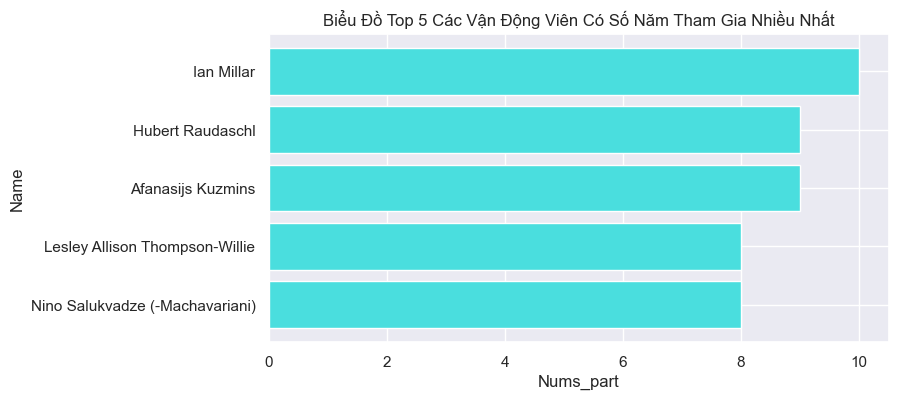

In [16]:
plt.figure(figsize = (8, 4))
ax = plt.barh(num_year_participate['Name'], num_year_participate[0], color = "#4ADEDE")
plt.xlabel('Nums_part')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Năm Tham Gia Nhiều Nhất')
plt.gca().invert_yaxis()
plt.show()

### 4.2. Top 5 vận động viên đạt nhiều huy chương nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng huy chương theo từng loại Gold, Silver, Bronze của các vận động viên. Chọn ra top 5 người có tổng số huy chương nhiều nhất. Ta lưu kết quả vào series `num_medal_reward`.
- Bước 2: Từ kết quả ở trên, ta vẽ group stack bar chart, trong đó trục hoành là tên và trục tung là số lượng huy chương.Ta đặt tên trục hoành là "Name" và tên trục tung là "Nums_medal".

Code bước 1. 

In [17]:
num_medal_reward = ethlete_df.groupby(['Name', 'Medal']).size()
num_medal_reward = num_medal_reward.reset_index()
num_medal_reward = num_medal_reward.pivot_table(index = "Name", columns = "Medal", values = 0, fill_value = 0)
num_medal_reward['sum_cols'] = num_medal_reward.sum(axis = 1)
num_medal_reward = num_medal_reward.sort_values('sum_cols' , ascending = False)
num_medal_reward = num_medal_reward.drop(columns = 'sum_cols').head()
columns_titles   = ["Bronze","Silver","Gold"]
num_medal_reward = num_medal_reward.reindex(columns = columns_titles)
display(num_medal_reward)

Medal,Bronze,Silver,Gold
Name,,,
"Michael Fred Phelps, II",2,3,23
Larysa Semenivna Latynina (Diriy-),4,5,9
Nikolay Yefimovich Andrianov,3,5,7
Ole Einar Bjrndalen,1,4,8
Borys Anfiyanovych Shakhlin,2,4,7


Code bước 2. 

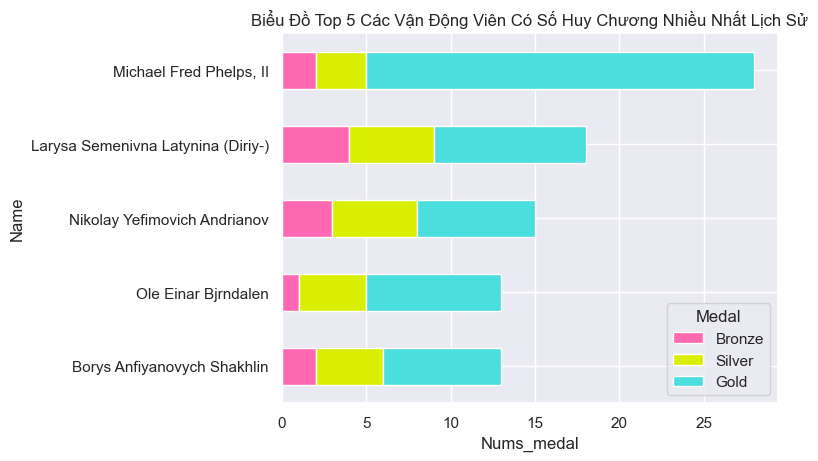

In [18]:
ax = num_medal_reward.plot.barh(color = ["#FF69B4","#DAEE01","#4ADEDE"], stacked = True)
plt.xlabel('Nums_medal')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Huy Chương Nhiều Nhất Lịch Sử')
plt.gca().invert_yaxis()
plt.show()

### 4.3. Quốc gia có thành tích tốt nhất qua các kỳ Olympic mùa hè?

Để trả lời cho câu hỏi này, ta sẽ tìm top 3 quốc gia có tổng số huy chương cao nhất và biểu diễn số lượng huy chương của các quốc gia này giành được qua các năm (Olympic mùa hè).

Đối với những môn thể thao đồng đội, tuy huy chương được trao cho từng thành viên trong đội, nhưng khi tính tổng số huy chương của quốc gia ta chỉ tính 1 huy chương cho một nội dung thi đấu.

- Đầu tiên ta sẽ tìm tên những môn thể thao đồng đội, nó sẽ là `Event` mà trong một năm có nhiều bộ huy chương được trao.



In [19]:
team_events = pd.pivot_table(ethlete_df,
                                      index = ['region', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'isWon',
                                      aggfunc = 'sum',
                                     fill_value = 0).reset_index()

team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()
team_sports

array(["Polo Men's Polo", "Rowing Men's Double Sculls",
       "Football Men's Football", "Basketball Men's Basketball",
       "Cycling Men's Madison", 'Sailing Mixed Multihull',
       "Hockey Men's Hockey", "Rugby Men's Rugby",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Cycling Men's Tandem Sprint, 2,000 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Equestrianism Men's Three-Day Event, Team",
       'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Tennis Men's Doubles",
       "Rowing Women's Coxless Pairs", "Sailing Men's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
     

- Qua quan sát ta thấy có 1 vài môn thể thao không phải là môn thể thao đồng đội nhưng vẫn được thêm vào đây. Nguyên nhân là do có tồn tại trường hợp trao nhiều hơn 1 huy chương vàng khi các vận động viên có cùng điểm số/ thời gian. Ta sẽ loại bỏ những môn thể thao này

In [20]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(remove_sports))

- Ta tạo thêm cột `isTeamSport` để ghi nhận việc `Event` đó có phải là môn thể thao đồng đội hay không.

In [21]:
ethlete_df['isTeamSport'] = np.where(ethlete_df['Event'].map(lambda x: x in team_sports), 1, 0)
ethlete_df['isTeamSport'] = ethlete_df['isTeamSport'].astype(bool)

- Tính tổng số huy chương của mỗi quốc gia cho môn thể thao cá nhân.

In [22]:
Total_Medal_Individual = ethlete_df.query("Season=='Summer' & isTeamSport==0 & isWon==1").value_counts(['region','Medal'])\
                .reset_index().pivot(index = 'region', columns = 'Medal', values = 0).fillna(0)
Total_Medal_Individual = Total_Medal_Individual[['Gold','Silver','Bronze']]

- Tính tổng số huy chương của mỗi quốc gia cho môn thể thao đồng đội.

In [23]:
temp=pd.DataFrame(ethlete_df.query("Season=='Summer' & isTeamSport==1 & isWon==1")[['Event','region','Medal']]).drop_duplicates(keep='first')
Total_Medal_Team=temp.value_counts(['region','Medal'])\
                .reset_index().pivot(index = 'region', columns = 'Medal', values = 0).fillna(0)
Total_Medal_Team=Total_Medal_Team[['Gold','Silver','Bronze']]

- Tạo dataframe tổng huy chương và sắp xếp.

In [24]:
Total_Medal=Total_Medal_Individual.add(Total_Medal_Team, fill_value=0)
Total_Medal['Total'] = Total_Medal['Gold'] + Total_Medal['Silver'] + Total_Medal['Bronze']
Total_Medal = Total_Medal.sort_values(by = 'Total', ascending = False).astype(int)
Total_Medal

Medal,Gold,Silver,Bronze,Total
region,,,,
USA,820,728,649,2197
Russia,494,432,442,1368
Germany,332,385,413,1130
UK,233,264,261,758
France,200,230,247,677
...,...,...,...,...
Kosovo,1,0,0,1
Montenegro,0,1,0,1
Macedonia,0,0,1,1


Bây giờ ta sẽ tìm top 3 quốc gia đạt được nhiều huy chương nhất các kỳ Olympics mùa hè và phân tích 1 chút về thành tích của 3 quốc gia đó qua các giai đoạn.

In [25]:
top3_countries = list(Total_Medal.head(3).index)
top3_countries

['USA', 'Russia', 'Germany']

Không quá bất ngờ khi top 3 dẫn đầu số huy chương Olympics đều là những cường quốc hàng đầu thế giới (Mỹ, Nga, Đức). Sau đây là thống kê số huy chương mà 3 quốc gia đó đã đạt được.

In [26]:
medals_per_year = pd.pivot_table(ethlete_df[ethlete_df['Season']=='Summer'],
                                  index   = 'Year',
                                  columns = 'region',
                                  values  = 'isWon' ,
                                  aggfunc = 'sum')[top3_countries]

In [27]:
medals_per_year

region,USA,Russia,Germany
Year,,,
1896,20.0,NaN,32.0
1900,63.0,0.0,45.0
1904,394.0,NaN,16.0
1906,24.0,NaN,30.0
1908,65.0,3.0,21.0
1912,107.0,14.0,53.0
1920,194.0,NaN,NaN
1924,182.0,0.0,NaN
1928,88.0,NaN,77.0


Nhìn vào bảng kết quả, ta thấy dữ liệu của nước Nga bị thiếu rất nhiều trong khoảng thời gian từ kỳ Thế vận hội năm 1896 đến 1948 nhưng đây không phải là lỗi thiếu dữ liệu! Và đây là lí do:

Nga lần đầu tham dự Thế vận hội vào năm năm 1900 cũng như gửi vận động viên (VĐV) tới các kỳ Mùa hè 1908 và 1912. Sau Cách mạng Nga (1917) và tiếp đó là sự thành lập Liên bang Xô Viết năm 1922, sự góp mặt của các VĐV Nga bị gián đoạn cho tới 1952.

Vì vậy ta sẽ chỉ phân tích dữ liệu từ kỳ Thế vận hội năm 1952 trở về sau.

In [28]:
medals_per_year = medals_per_year.drop([x for x in medals_per_year.index if x < 1952])

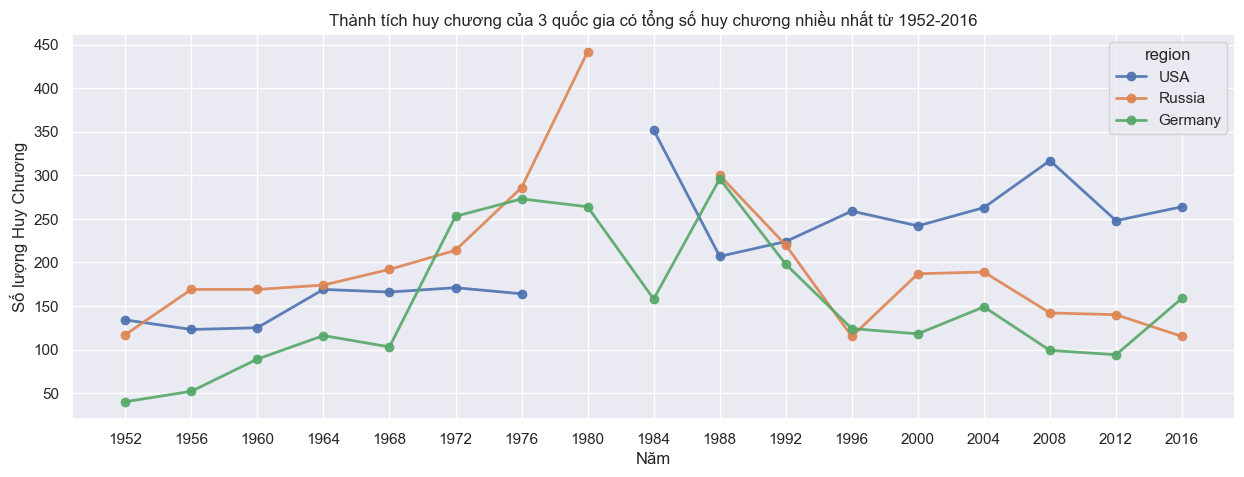

In [29]:
medals_per_year.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (15,5), linewidth = 2)
plt.xlabel('Năm')
plt.xticks(medals_per_year.index)
plt.ylabel('Số lượng Huy Chương')
plt.title('Thành tích huy chương của 3 quốc gia có tổng số huy chương nhiều nhất từ 1952-2016')
plt.show()

**Điểm giá trị bị thiếu của Mỹ vào năm 1980 không phải là lỗi thiếu dữ liệu!** 

Năm 1980, Hoa Kỳ kêu gọi tẩy chay Thế vận hội Olympic mùa hè ở Moscow để phản đối cuộc xâm lược Afghanistan của Liên Xô vào cuối năm 1979, có 64 quốc gia khác hưởng ứng cuộc tẩy chay này. Đây là lần đầu tiên và duy nhất mà Mỹ tẩy chay Olympics. 

Thế vận hội 1980 là Kỳ Thế vận hội đầu tiên mà Việt Nam tham dự với tư cách là một quốc gia thống nhất.

**Điểm giá trị bị thiếu của Nga vào năm 1984 cũng không có lỗi!**

08/05/1984, Liên Xô tuyên bố tẩy chay Olympics 1984. Việc tẩy chay Thế vận hội Mùa hè 1984 ở Los Angeles diễn ra sau 4 năm kể từ cuộc tẩy chay Thế vận hội Mùa hè 1980 ở Moscow do Hoa Kỳ lãnh đạo. Nguyên nhân chính được các quan chức Moscow đưa ra là vận động viên Liên Xô có thể sẽ không được an toàn trước các cuộc biểu tình và tấn công thù địch do phía Mỹ hậu thuẫn. Sau khi Liên Xô đưa ra tuyên bố "tẩy chay" Olympic 1984, 13 nước có quan hệ thân thiết với quốc gia xã hội chủ nghĩa lớn nhất thế giới cũng đưa ra các thông báo tương tự và từ chối tham dự.

Có vấn đề gì bấp cập không khi lần mà 2 quốc gia này giành được nhiều huy chương nhất trong một Kỳ thế vận hội cũng là là lần mà họ làm chủ nhà.

**Với những mốc thời gian còn lại:**

Từ những năm 1952 đến 1976, số lượng huy chương giành được của các quốc gia Mỹ, Nga, Đức gần như tăng dần qua các năm.

Từ những năm 1992 đến 2016, Mỹ luôn dẫn đầu về thổng số lượng huy chương trong  một Kỳ thế vận hội, trong khi Nga và Đức thì có xu hướng giảm.

### 4.4. Thành tích của Thể thao Việt Nam trong lịch sử tham dự Olympic?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Tạo Dataframe chứa dữ liệu gồm số vận động viên Việt Nam tham dự, số huy chương đạt được qua các năm

In [30]:
temp  = pd.DataFrame(ethlete_df.query("region=='Vietnam'"))
df_vn = pd.DataFrame(temp.groupby(['Year', 'Season'])['Name'].count().rename('number of athletes').reset_index())

temp  = temp.value_counts(['Year', 'Medal']).reset_index().pivot_table(index = 'Year', columns = 'Medal', values = 0,aggfunc = 'sum')

df_vn = df_vn.merge(temp, on = 'Year', how = 'left')

,Year,Season,number of athletes,Gold,Silver
0,1952,Summer,13,NaN,NaN
1,1956,Summer,10,NaN,NaN
2,1960,Summer,5,NaN,NaN
3,1964,Summer,23,NaN,NaN
4,1968,Summer,9,NaN,NaN
5,1972,Summer,2,NaN,NaN
6,1980,Summer,38,NaN,NaN
7,1988,Summer,12,NaN,NaN
8,1992,Summer,10,NaN,NaN
9,1996,Summer,6,NaN,NaN


- Thêm cột huy chương bị thiếu

In [31]:
for c in ['Year', 'number of athletes', 'Gold', 'Silver', 'Bronze']:
    if c not in list(df_vn.columns):
        df_vn[c] = np.nan
df_vn = df_vn[['Year', 'Season', 'number of athletes', 'Gold', 'Silver', 'Bronze']]

,Year,Season,number of athletes,Gold,Silver,Bronze
0,1952,Summer,13,NaN,NaN,NaN
1,1956,Summer,10,NaN,NaN,NaN
2,1960,Summer,5,NaN,NaN,NaN
3,1964,Summer,23,NaN,NaN,NaN
4,1968,Summer,9,NaN,NaN,NaN
5,1972,Summer,2,NaN,NaN,NaN
6,1980,Summer,38,NaN,NaN,NaN
7,1988,Summer,12,NaN,NaN,NaN
8,1992,Summer,10,NaN,NaN,NaN
9,1996,Summer,6,NaN,NaN,NaN


Việt Nam là quốc gia không có mùa đông băng tuyết, vận động viên sẽ không có đủ điều kiện luyện tập, thường phải luyện tập ở nước ngoài. Vì những điều kiện khó khăn đó cho nên từ 1952 đến 2016 Việt Nam chưa từng tham dự Olympic mùa Đông.

Vì lý do kinh tế và chính trị, Việt Nam không tham dự hai kỳ Olympic mùa Hè 1976 và 1984. 

- Ta thêm 2 dòng bị thiếu là 2 năm mà Việt Nam không tham dự.

In [32]:
df_vn.loc[df_vn.shape[0]] = {'Year':1976, 'Season':'Summer'}
df_vn.loc[df_vn.shape[0]] = {'Year':1984, 'Season':'Summer'}

,Year,Season,number of athletes,Gold,Silver,Bronze
0,1952,Summer,13.0,NaN,NaN,NaN
1,1956,Summer,10.0,NaN,NaN,NaN
2,1960,Summer,5.0,NaN,NaN,NaN
3,1964,Summer,23.0,NaN,NaN,NaN
4,1968,Summer,9.0,NaN,NaN,NaN
5,1972,Summer,2.0,NaN,NaN,NaN
6,1980,Summer,38.0,NaN,NaN,NaN
7,1988,Summer,12.0,NaN,NaN,NaN
8,1992,Summer,10.0,NaN,NaN,NaN
9,1996,Summer,6.0,NaN,NaN,NaN


Việt Nam lần đầu tham dự Thế vận hội với tư cách là một quốc gia thống nhất là vào năm 1980. Cho nên ta sẽ chỉ phân tích dữ liệu từ năm 1980.

In [33]:
df_vn = df_vn.drop([x for x in df_vn.index if df_vn.loc[x,'Year'] < 1980]).set_index('Year').sort_index()
df_vn

,Season,number of athletes,Gold,Silver,Bronze
Year,,,,,
1980,Summer,38.0,NaN,NaN,NaN
1984,Summer,NaN,NaN,NaN,NaN
1988,Summer,12.0,NaN,NaN,NaN
1992,Summer,10.0,NaN,NaN,NaN
1996,Summer,6.0,NaN,NaN,NaN
2000,Summer,7.0,NaN,1.0,NaN
2004,Summer,11.0,NaN,NaN,NaN
2008,Summer,18.0,NaN,1.0,NaN
2012,Summer,24.0,NaN,NaN,NaN


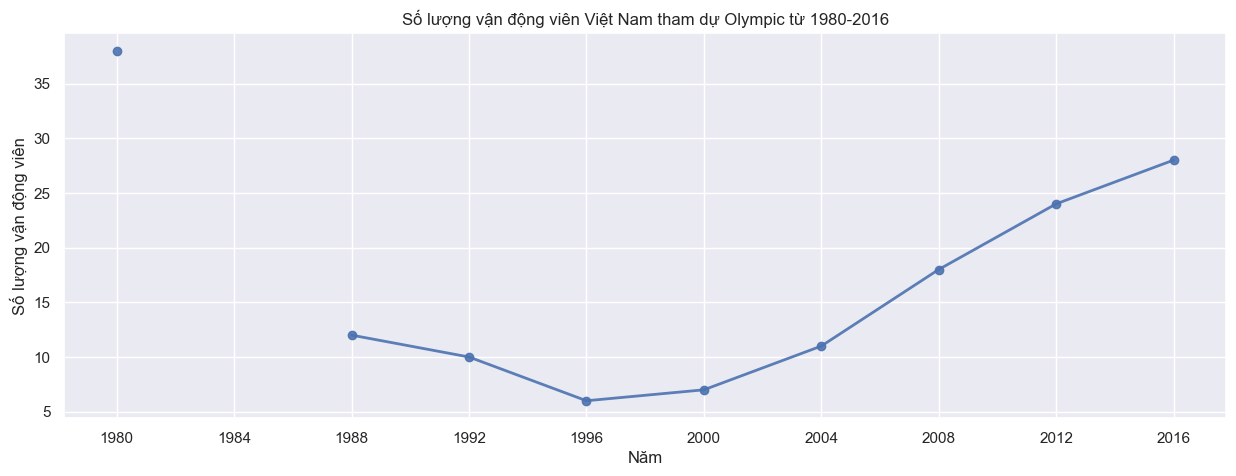

In [34]:
df_vn['number of athletes'].plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (15,5), linewidth = 2)
plt.xlabel('Năm')
plt.xticks(df_vn.index)
plt.ylabel('Số lượng vận động viên')
plt.title('Số lượng vận động viên Việt Nam tham dự Olympic từ 1980-2016')
plt.show()

Số lượng vận động viên Việt Nam tăng liên tục từ năm 1996 đến 2016.

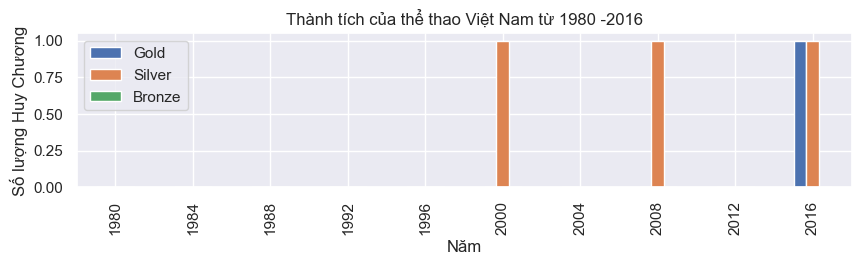

In [35]:
df_vn.plot(y = ["Gold", "Silver",'Bronze'], kind = "bar", figsize = (10, 2))
plt.xlabel('Năm')
plt.ylabel('Số lượng Huy Chương')
plt.title('Thành tích của thể thao Việt Nam từ 1980 -2016')
plt.show()

Tổng số huy chương mà Việt Nam đã dành được:

In [36]:
df_vn[['Gold','Silver','Bronze']].sum().sum()

4.0

Các vận động viên dành được huy chương:

In [37]:
ethlete_df.query("region=='Vietnam' & isWon==1")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,isWon,isTeamSport
96703,48962,Hong Anh Tun,M,23.0,152.0,56.0,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Bantamweight,Silver,Vietnam,True,False
96709,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,True,False
96710,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,Vietnam,True,False
242905,121646,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,Vietnam,True,False


Gần 4 thập kỷ trôi qua từ lần đầu tiên góp mặt tại các kỳ Olympic, thể thao Việt Nam mới có 4 VĐV đoạt huy chương, trong đó xạ thủ bắn súng Hoàng Xuân Vinh là người duy nhất sở hữu HCV.

- Olympic Moscow (Nga) 1980: Đoàn TTVN tham dự với 38 VĐV, không giành huy chương.

- Olympic Seoul (Hàn Quốc) 1988: Tham dự với 12 VĐV, không giành huy chương.

- Olympic Barcelona (Tây Ban Nha) 1992: Tham dự với 10 VĐV, không giành huy chương.

- Olympic Atlanta (Mỹ) 1996: Tham dự với 6 VĐV, không giành huy chương.

- Olympic Sydney (Australia) 2000: Tham dự với 7 VĐV, lần đầu tiên có tên trên bảng tổng sắp huy chương, với tấm HCB của nữ võ sĩ taekwondo Trần Hiếu Ngân ở hạng cân 57kg.

- Olympic Athens (Hy Lạp) 2004: Tham dự với 11 VĐV, không giành huy chương.

- Olympic Bắc Kinh (Trung Quốc) 2008: Tham dự với 18 VĐV, giành 1 HCB nhờ công của lực sỹ cử tạ Hoàng Anh Tuấn (hạng 56 kg nam).

- Olympic London (Anh) 2012: Tham dự với 24 VĐV, giành 1 HCĐ sau khi Trần Lê Quốc Toàn được đôn từ hạng tư nội dung 56kg lên vị trí thứ ba, thế chỗ VĐV của Azerbajan bị tước huy chương vì doping.

- Olympic Rio (Brazil) 2016: Tham dự với 28 VĐV, trong đó xạ thủ bắn súng Hoàng Xuân Vinh xuất sắc giành 1 HCV nội dung 10m súng ngắn hơi và 1 HCB nội dung 50m súng ngắn.